In [9]:
import pandas as pd

# Load the file
file_path = "data/Races - City Council.csv"
data = pd.read_csv(file_path)

# Show basic info and first few rows
print(data.info())
print(data.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Ward Number               50 non-null     int64  
 1   Alderperson               50 non-null     object 
 2   Email Address             50 non-null     object 
 3   Value alignment out of 5  26 non-null     float64
 4   Notes/specific votes      28 non-null     object 
 5   Vulnerability             20 non-null     object 
 6   Challenger Names          4 non-null      object 
 7   Challenger Notes          1 non-null      object 
dtypes: float64(1), int64(1), object(6)
memory usage: 3.3+ KB
None
   Ward Number         Alderperson             Email Address  \
0            1     Daniel La Spata  ward01@cityofchicago.org   
1            2       Brian Hopkins  ward02@cityofchicago.org   
2            3          Pat Dowell  ward03@cityofchicago.org   
3            4  Lamont J.

In [13]:
import pandas as pd

# Load your dataset (assuming it's already in `city_council_data`)
df = data.copy()

# Keep only relevant columns
df = df[['Ward Number', 'Alderperson', 'Value alignment out of 5', 'Vulnerability']]

# Rename columns for clarity
df.columns = ['Ward', 'Alderperson', 'Value Alignment', 'Vulnerability']

# Convert 'Vulnerability' to numeric scale
vulnerability_mapping = {
    "Highly": 5, "Very High": 4, "Moderate": 3, "Low": 2, "Very low": 1
}

df['Vulnerability Score'] = df['Vulnerability'].map(vulnerability_mapping)

# Handle missing values
df['Vulnerability Score'] = df['Vulnerability Score'].fillna(0)  # Replace NaN with 0
df['Value Alignment'] = df['Value Alignment'].fillna(0)  # Optional: Replace NaN with 0

# Drop original 'Vulnerability' column (if no longer needed)
df.drop(columns=['Vulnerability'], inplace=True)

# Sort by highest vulnerability first for better visuals
df = df.sort_values(by='Vulnerability Score', ascending=False)

# Reset index after sorting
df.reset_index(drop=True, inplace=True)

# Print a summary for debugging
print(df.info())
print(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Ward                 50 non-null     int64  
 1   Alderperson          50 non-null     object 
 2   Value Alignment      50 non-null     float64
 3   Vulnerability Score  50 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 1.7+ KB
None
   Ward         Alderperson  Value Alignment  Vulnerability Score
0    49     Maria E. Hadden              3.0                  2.0
1    42      Brendan Reilly              3.0                  2.0
2     2       Brian Hopkins             -1.0                  1.0
3     3          Pat Dowell              3.0                  1.0
4     4  Lamont J. Robinson              4.0                  1.0


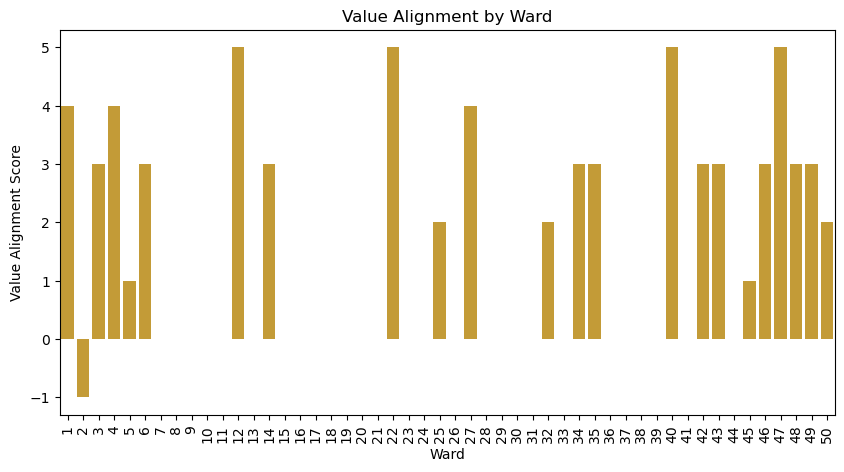

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Sort Wards by Value Alignment for better readability
df = df.sort_values("Value Alignment", ascending=True)

# Fix: Remove unnecessary color encoding (use a single color)
plt.figure(figsize=(10, 5))
sns.barplot(data=df, x="Ward", y="Value Alignment", color="goldenrod")  # Single-tone color
plt.xticks(rotation=90)
plt.title("Value Alignment by Ward")
plt.xlabel("Ward")
plt.ylabel("Value Alignment Score")
plt.show()



/var/folders/rt/hb4rdstd59s6h1h6lfd8ghjc0000gn/T/ipykernel_71660/2130704568.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(data=df, x="Alderperson", y="Value Alignment", jitter=True, size=8, alpha=0.7, palette="magma")


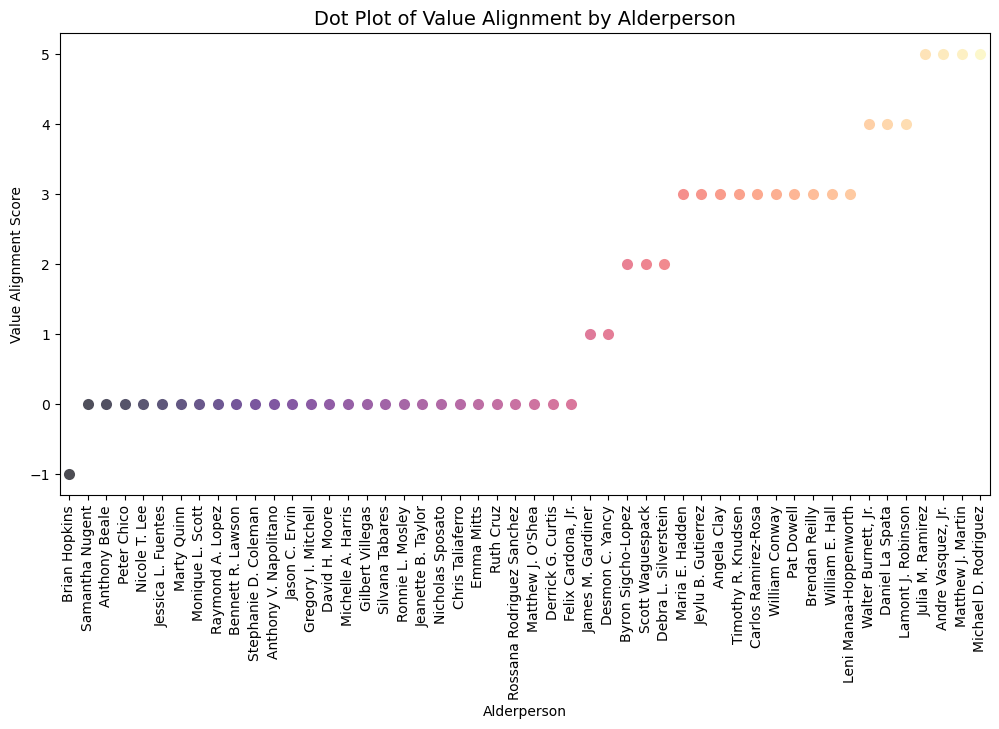

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
 

# Set figure size
plt.figure(figsize=(12, 6))

# Dot plot instead of heatmap
sns.stripplot(data=df, x="Alderperson", y="Value Alignment", jitter=True, size=8, alpha=0.7, palette="magma")

# Rotate labels for readability
plt.xticks(rotation=90)
plt.title("Dot Plot of Value Alignment by Alderperson", fontsize=14)
plt.xlabel("Alderperson")
plt.ylabel("Value Alignment Score")

# Show plot
plt.show()


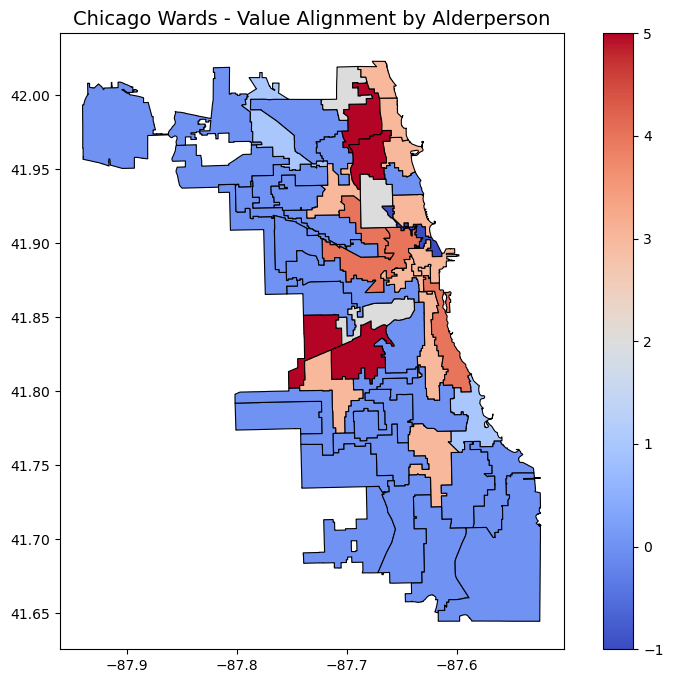

In [16]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load the downloaded shapefile (Update the path to your actual file)
wards = gpd.read_file("data/geo_export_283be94a-f4eb-4f8a-bc26-6cbd1d9a78e7.shx")

# Merge wards with Value Alignment data
wards = wards.merge(df, left_on="ward", right_on="Ward")

# Plot the map
fig, ax = plt.subplots(figsize=(10, 8))
wards.plot(column="Value Alignment", cmap="coolwarm", linewidth=0.8, edgecolor="black", legend=True, ax=ax)

# Titles and labels
plt.title("Chicago Wards - Value Alignment by Alderperson", fontsize=14)

# Show plot
plt.show()



In [17]:
import pandas as pd

# Load the election results dataset (update path if needed)
file_path = "data/Races - 2023 Municipal Election Results.csv"
election_df = pd.read_csv(file_path)

# Display basic info
print(election_df.info())

# Show first few rows
display(election_df.head())

# Check for missing values
print(election_df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ward         182 non-null    int64  
 1   Candidate    182 non-null    object 
 2   Votes        182 non-null    object 
 3   Incumbent    37 non-null     object 
 4   Percent      182 non-null    object 
 5   Unnamed: 5   0 non-null      float64
 6   Ward.1       50 non-null     float64
 7   sum Votes    50 non-null     float64
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   5 non-null      object 
 10  Unnamed: 10  4 non-null      object 
dtypes: float64(4), int64(1), object(6)
memory usage: 15.8+ KB
None


,Ward,Candidate,Votes,Incumbent,Percent,Unnamed: 5,Ward.1,sum Votes,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,5,William Calloway (write-in),1,NaN,0.01%,NaN,1.0,14647.0,NaN,Sub 5000 voters Elections,NaN
1,49,Willie Davis (write-in),3,NaN,0.03%,NaN,2.0,11200.0,NaN,Ward,sum Votes
2,29,Walter Adamcsyk (write-in),6,NaN,0.06%,NaN,3.0,9556.0,NaN,14,4728
3,26,Kirk Ortiz (write-in),32,NaN,0.36%,NaN,4.0,12509.0,NaN,15,4873
4,30,Andrew Cleaver (write-in),42,NaN,0.41%,NaN,5.0,10676.0,NaN,22,4628


Ward             0
Candidate        0
Votes            0
Incumbent      145
Percent          0
Unnamed: 5     182
Ward.1         132
sum Votes      132
Unnamed: 8     182
Unnamed: 9     177
Unnamed: 10    178
dtype: int64


In [18]:


# Drop unnecessary "Unnamed" columns
df = election_df.drop(columns=[col for col in df.columns if "Unnamed" in col])

# Check if "Ward.1" is a duplicate of "Ward" and drop if necessary
df = df.drop(columns=["Ward.1"]) if "Ward.1" in df.columns else df

# Fill missing values in "Incumbent" with "Unknown"
df["Incumbent"] = df["Incumbent"].fillna("Unknown")

# Fill missing values in "sum Votes" with 0 (assuming it's a total count)
df["sum Votes"] = df["sum Votes"].fillna(0)

# Check the cleaned dataset
print(df.info())
display(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ward         182 non-null    int64  
 1   Candidate    182 non-null    object 
 2   Votes        182 non-null    object 
 3   Incumbent    182 non-null    object 
 4   Percent      182 non-null    object 
 5   Unnamed: 5   0 non-null      float64
 6   sum Votes    182 non-null    float64
 7   Unnamed: 8   0 non-null      float64
 8   Unnamed: 9   5 non-null      object 
 9   Unnamed: 10  4 non-null      object 
dtypes: float64(3), int64(1), object(6)
memory usage: 14.3+ KB
None


,Ward,Candidate,Votes,Incumbent,Percent,Unnamed: 5,sum Votes,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,5,William Calloway (write-in),1,Unknown,0.01%,NaN,14647.0,NaN,Sub 5000 voters Elections,NaN
1,49,Willie Davis (write-in),3,Unknown,0.03%,NaN,11200.0,NaN,Ward,sum Votes
2,29,Walter Adamcsyk (write-in),6,Unknown,0.06%,NaN,9556.0,NaN,14,4728
3,26,Kirk Ortiz (write-in),32,Unknown,0.36%,NaN,12509.0,NaN,15,4873
4,30,Andrew Cleaver (write-in),42,Unknown,0.41%,NaN,10676.0,NaN,22,4628


In [19]:
import pandas as pd

# Drop unnecessary columns
df = df.drop(columns=[col for col in df.columns if "Unnamed" in col])

# Rename "sum Votes" to "Total Votes"
df = df.rename(columns={"sum Votes": "Total Votes"})

# Convert "Percent" column to numerical (removing the % sign)
df["Percent"] = df["Percent"].str.replace("%", "").astype(float) / 100

# Fill missing "Incumbent" values with "No"
df["Incumbent"] = df["Incumbent"].fillna("No")

# Display cleaned dataset info
print(df.info())
display(df.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182 entries, 0 to 181
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ward         182 non-null    int64  
 1   Candidate    182 non-null    object 
 2   Votes        182 non-null    object 
 3   Incumbent    182 non-null    object 
 4   Percent      182 non-null    float64
 5   Total Votes  182 non-null    float64
dtypes: float64(2), int64(1), object(3)
memory usage: 8.7+ KB
None


,Ward,Candidate,Votes,Incumbent,Percent,Total Votes
0,5,William Calloway (write-in),1,Unknown,0.0001,14647.0
1,49,Willie Davis (write-in),3,Unknown,0.0003,11200.0
2,29,Walter Adamcsyk (write-in),6,Unknown,0.0006,9556.0
3,26,Kirk Ortiz (write-in),32,Unknown,0.0036,12509.0
4,30,Andrew Cleaver (write-in),42,Unknown,0.0041,10676.0


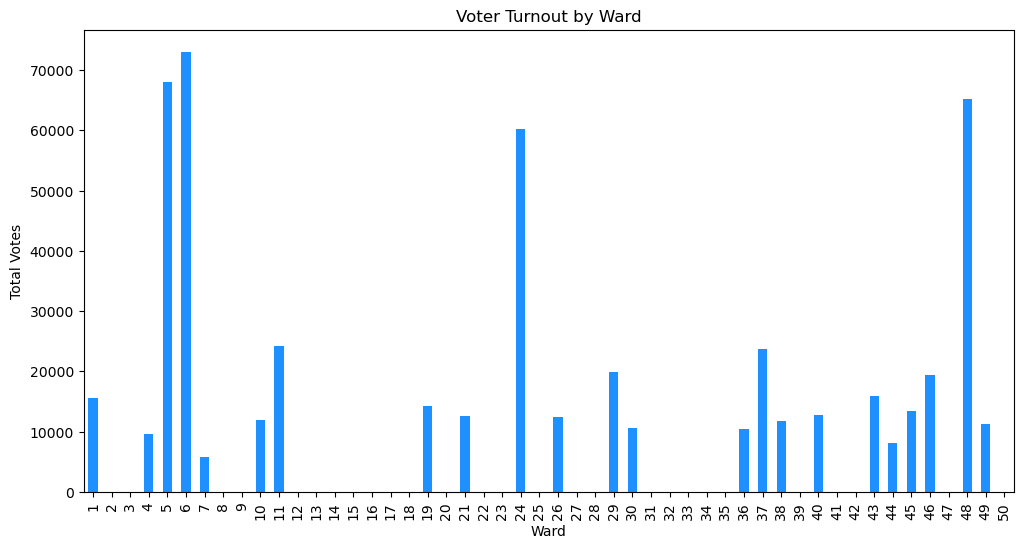

In [20]:
import matplotlib.pyplot as plt

# Plot Total Votes per Ward
df.groupby("Ward")["Total Votes"].sum().plot(kind="bar", figsize=(12, 6), color="dodgerblue")
plt.title("Voter Turnout by Ward")
plt.xlabel("Ward")
plt.ylabel("Total Votes")
plt.show()


In [30]:
import pandas as pd

# Load dataset
df = pd.read_csv("data/Races - 2023 Municipal Election Results.csv")

# Drop unnamed and duplicate columns
df = df.drop(columns=[col for col in df.columns if "Unnamed" in col], errors="ignore")
print(df.columns)
# Fix Ward column (keep only one)
df = df.rename(columns={"Ward": "Ward", "Ward.1": "Ward_Extra"})
df = df.drop(columns=["Ward_Extra"], errors="ignore")  # Drop the duplicate if unnecessary

# Convert numeric columns
df["Votes"] = pd.to_numeric(df["Votes"], errors="coerce")
df["sum Votes"] = pd.to_numeric(df["sum Votes"], errors="coerce")
df["Percent"] = pd.to_numeric(df["Percent"], errors="coerce")

# Drop rows where 'Ward' is missing (if applicable)
df = df.dropna(subset=["Ward"])

# Sort by Ward and Candidate
df = df.sort_values(by=["Ward", "Votes"], ascending=[True, False])

# Print summary for debugging
print(df.info())
print(df.head())


Index(['Ward', 'Candidate', 'Votes', 'Incumbent', 'Percent', 'Ward.1',
       'sum Votes'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 182 entries, 45 to 162
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Ward       182 non-null    int64  
 1   Candidate  182 non-null    object 
 2   Votes      63 non-null     float64
 3   Incumbent  37 non-null     object 
 4   Percent    0 non-null      float64
 5   sum Votes  50 non-null     float64
dtypes: float64(3), int64(1), object(2)
memory usage: 10.0+ KB
None
     Ward         Candidate  Votes Incumbent  Percent  sum Votes
45      1  Proco Joe Moreno  999.0       NaN      NaN    15672.0
99      1   Andy Schneider     NaN       NaN      NaN        NaN
106     1        Sam Royko     NaN       NaN      NaN        NaN
146     1   Daniel La Spata    NaN         Y      NaN        NaN
174     2  Brian K. Hopkins    NaN         Y      NaN        NaN


In [24]:
# Print summary instead of ace_tools
print(df.info())  # Shows column types and missing values
print(df.head())  # Displays first few rows

# If you want to save the cleaned dataset:
df.to_csv("cleaned_election_results.csv", index=False)  # Saves as CSV


<class 'pandas.core.frame.DataFrame'>
Index: 100 entries, 18 to 181
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ward         100 non-null    object 
 1   Total Votes  50 non-null     float64
dtypes: float64(1), object(1)
memory usage: 2.3+ KB
None
   Ward  Total Votes
18    6      22745.0
40   24      17443.0
46    6      16253.0
44   43      16005.0
47   24      15903.0


In [25]:
import pandas as pd

# Load dataset
df = pd.read_csv("data/Races - 2023 Municipal Election Results.csv")

# Rename 'sum Votes' to 'Total Votes' for clarity
df = df.rename(columns={"sum Votes": "Total Votes"})

# Drop completely empty columns
df = df.drop(columns=["Percent"], errors="ignore")

# Fill missing votes forward within the same ward
df["Votes"] = df["Votes"].ffill()

# Ensure Total Votes is set per ward
df["Total Votes"] = df.groupby("Ward")["Total Votes"].transform(lambda x: x.ffill())

# Convert Votes and Total Votes to numeric
df["Votes"] = pd.to_numeric(df["Votes"], errors="coerce")
df["Total Votes"] = pd.to_numeric(df["Total Votes"], errors="coerce")

# Remove duplicate candidate rows (if some rows are empty placeholders)
df = df.dropna(subset=["Votes"])

# Sort for readability
df = df.sort_values(by=["Ward", "Votes"], ascending=[True, False])

# Print summary
print(df.info())
print(df.head())

# Save cleaned data
df.to_csv("cleaned_election_results.csv", index=False)


<class 'pandas.core.frame.DataFrame'>
Index: 63 entries, 45 to 1
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Ward         63 non-null     int64  
 1   Candidate    63 non-null     object 
 2   Votes        63 non-null     float64
 3   Incumbent    1 non-null      object 
 4   Unnamed: 5   0 non-null      float64
 5   Ward.1       47 non-null     float64
 6   Total Votes  55 non-null     float64
 7   Unnamed: 8   0 non-null      float64
 8   Unnamed: 9   5 non-null      object 
 9   Unnamed: 10  4 non-null      object 
dtypes: float64(5), int64(1), object(4)
memory usage: 5.4+ KB
None
    Ward         Candidate  Votes Incumbent  Unnamed: 5  Ward.1  Total Votes  \
45     1  Proco Joe Moreno  999.0       NaN         NaN    46.0      15672.0   
34     4       Helen West   692.0       NaN         NaN    35.0       9570.0   
54     5     Jocelyn Hare   927.0       NaN         NaN     NaN       9574.0   
41     5   

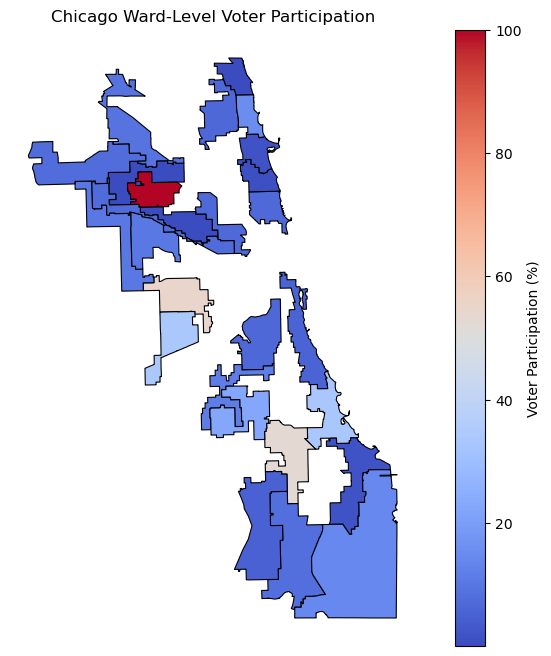

In [27]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

# Load Chicago ward shapefile (make sure to use your actual SHX/SHP file)
wards = gpd.read_file("data/geo_export_283be94a-f4eb-4f8a-bc26-6cbd1d9a78e7.shp")

# Load election turnout data
df = pd.read_csv("cleaned_election_results.csv")

# Convert Percent to numeric
df["Percent"] = df["Percent"].str.replace("%", "").astype(float)

# Aggregate turnout by ward
ward_turnout = df.groupby("Ward")["Percent"].sum().reset_index()

# Merge with ward boundaries GeoDataFrame
wards = wards.merge(ward_turnout, left_on="ward", right_on="Ward")

# Plot the choropleth map
fig, ax = plt.subplots(figsize=(10, 8))
wards.plot(column="Percent", cmap="coolwarm", linewidth=0.8, edgecolor="black",
           legend=True, legend_kwds={'label': "Voter Participation (%)"},
           ax=ax)

# Title and labels
plt.title("Chicago Ward-Level Voter Participation")
plt.axis("off")  # Hide axes for cleaner visualization
plt.show()




In [38]:
import pandas as pd

# Load the dataset
file_path = "data/Races - 2023 Municipal Election Results.csv"
df = pd.read_csv(file_path)

# Drop unnecessary or unnamed columns
df = df.drop(columns=[col for col in df.columns if "Unnamed" in col], errors="ignore")

# Fill missing values in 'Incumbent' with 'No' (or another suitable default)
df.fillna({'Incumbent': "No"}, inplace=True)

# Convert relevant columns to numeric types
df['Votes'] = pd.to_numeric(df['Votes'], errors='coerce')
df['Percent'] = pd.to_numeric(df['Percent'].str.rstrip('%'), errors='coerce') / 100  # Convert percent to decimal

# Drop any remaining rows with missing critical values (optional)
df.dropna(subset=['Votes', 'Percent'], inplace=True)

In [40]:
df.head

<bound method NDFrame.head of      Ward                    Candidate   Votes Incumbent  Percent  Ward.1  \
0       5  William Calloway (write-in)     1.0        No   0.0001     1.0   
1      49      Willie Davis (write-in)     3.0        No   0.0003     2.0   
2      29   Walter Adamcsyk (write-in)     6.0        No   0.0006     3.0   
3      26        Kirk Ortiz (write-in)    32.0        No   0.0036     4.0   
4      30    Andrew Cleaver (write-in)    42.0        No   0.0041     5.0   
..    ...                          ...     ...       ...      ...     ...   
84     24              Creative Scott    986.0        No   0.1482     NaN   
86     22           Neftalie Gonzalez    724.0        No   0.1564     NaN   
91     22         Kristian Armendariz    834.0        No   0.1802     NaN   
97     31      Esteban Burgoa Ontanon   1181.0        No   0.1876     NaN   
170    31            Felix Cardona Jr.  5113.0         Y   0.8124     NaN   

     sum Votes  
0      14647.0  
1      1120

In [43]:
import pandas as pd

# Load the dataset
file_path = "data/Races - 2023 Municipal Turnout (1).csv"
df = pd.read_csv(file_path)
df.head

<bound method NDFrame.head of      Registered Voters       Ballots Cast       Turnout Unnamed: 3
0            1,581,564            566,973        35.85%        NaN
1                  NaN                NaN           NaN        NaN
2               Ward 1                NaN           NaN        NaN
3             Precinct  Registered Voters  Ballots Cast    Turnout
4                    1               1496           672     44.92%
...                ...                ...           ...        ...
1487                25                382           113     29.58%
1488                26                887           233     26.27%
1489                27                272           121     44.49%
1490                28               1153           526     45.62%
1491             Total             28,571        10,634     37.22%

[1492 rows x 4 columns]>

In [45]:
df.describe


<bound method NDFrame.describe of      Registered Voters       Ballots Cast       Turnout
0            1,581,564            566,973        35.85%
1                  NaN                NaN           NaN
2               Ward 1                NaN           NaN
3             Precinct  Registered Voters  Ballots Cast
4                    1               1496           672
...                ...                ...           ...
1487                25                382           113
1488                26                887           233
1489                27                272           121
1490                28               1153           526
1491             Total             28,571        10,634

[1492 rows x 3 columns]>

In [30]:
import pandas as pd

# Load the dataset
file_path = "data/Races - 2023 Municipal Turnout (1).csv"
df = pd.read_csv(file_path, skiprows=4)  # Skipping unnecessary header rows
df.head





<bound method NDFrame.head of      Precinct Registered Voters Ballots Cast Turnout
0           1              1496          672  44.92%
1           2              1457          709  48.66%
2           3              1570          755  48.09%
3           4              1498          629  41.99%
4           5              1659          670  40.39%
...       ...               ...          ...     ...
1483       25               382          113  29.58%
1484       26               887          233  26.27%
1485       27               272          121  44.49%
1486       28              1153          526  45.62%
1487    Total            28,571       10,634  37.22%

[1488 rows x 4 columns]>

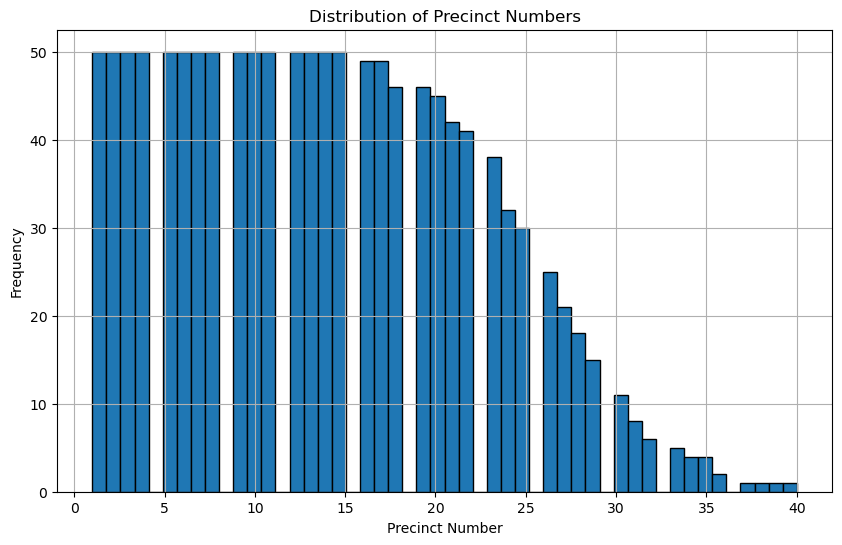

In [31]:
df["Precinct"] = pd.to_numeric(df["Precinct"], errors="coerce")

# Plot a histogram of precinct values
plt.figure(figsize=(10, 6))
df["Precinct"].hist(bins=50, edgecolor="black")
plt.xlabel("Precinct Number")
plt.ylabel("Frequency")
plt.title("Distribution of Precinct Numbers")
plt.grid(True)

plt.show()

In [32]:
# Find rows where Precinct is not a number (they might still exist)
weird_rows = df[~df["Precinct"].astype(str).str.isnumeric()]
weird_rows




,Precinct,Registered Voters,Ballots Cast,Turnout
0,1.0,1496,672,44.92%
1,2.0,1457,709,48.66%
2,3.0,1570,755,48.09%
3,4.0,1498,629,41.99%
4,5.0,1659,670,40.39%
...,...,...,...,...
1483,25.0,382,113,29.58%
1484,26.0,887,233,26.27%
1485,27.0,272,121,44.49%
1486,28.0,1153,526,45.62%


In [33]:
# Find rows where "Precinct" is null
null_precinct_rows = df[df["Precinct"].isna()]
null_precinct_rows
print(null_precinct_rows.head(30))


     Precinct  Registered Voters  Ballots Cast  Turnout
26        NaN             38,360        15,146   39.48%
27        NaN                NaN           NaN      NaN
28        NaN                NaN           NaN      NaN
29        NaN  Registered Voters  Ballots Cast  Turnout
55        NaN             33,297        13,409   40.27%
56        NaN                NaN           NaN      NaN
57        NaN                NaN           NaN      NaN
58        NaN  Registered Voters  Ballots Cast  Turnout
86        NaN             34,088        11,666   34.22%
87        NaN                NaN           NaN      NaN
88        NaN                NaN           NaN      NaN
89        NaN  Registered Voters  Ballots Cast  Turnout
118       NaN             31,793        13,016   40.94%
119       NaN                NaN           NaN      NaN
120       NaN                NaN           NaN      NaN
121       NaN  Registered Voters  Ballots Cast  Turnout
147       NaN             28,053        11,268  

In [34]:

current_ward = 1
wards = []

# Iterate over rows to assign ward numbers
for index, row in df.iterrows():
    if pd.notna(row["Precinct"]):  # If the row has a precinct number
        wards.append(current_ward)  # Assign the current ward number
    else:
        if isinstance(row["Registered Voters"], str) and "Registered Voters" in row["Registered Voters"]:
            # If the row contains the section title, ignore it
            wards.append(None)
        elif pd.notna(row["Registered Voters"]):  # This is the ward summary row
            current_ward += 1  # Move to the next ward
            wards.append(None)  # Don't keep this row
        else:
            wards.append(None)  # Empty row

# Assign new Ward column
df["Ward"] = wards

# Remove unwanted rows (those that don't have a precinct assigned)
df_cleaned = df.dropna(subset=["Precinct"]).copy()

# Convert columns to the right data type
df_cleaned["Precinct"] = df_cleaned["Precinct"].astype(int)
df_cleaned["Registered Voters"] = df_cleaned["Registered Voters"].str.replace(",", "").astype(int)
df_cleaned["Ballots Cast"] = df_cleaned["Ballots Cast"].str.replace(",", "").astype(int)
df_cleaned["Turnout"] = df_cleaned["Turnout"].str.replace("%", "").astype(float)


df_cleaned.describe

<bound method NDFrame.describe of       Precinct  Registered Voters  Ballots Cast  Turnout  Ward
0            1               1496           672    44.92   1.0
1            2               1457           709    48.66   1.0
2            3               1570           755    48.09   1.0
3            4               1498           629    41.99   1.0
4            5               1659           670    40.39   1.0
...        ...                ...           ...      ...   ...
1482        24               1696           748    44.10  50.0
1483        25                382           113    29.58  50.0
1484        26                887           233    26.27  50.0
1485        27                272           121    44.49  50.0
1486        28               1153           526    45.62  50.0

[1291 rows x 5 columns]>

In [35]:
df_cleaned["Ward"].describe()

count    1291.000000
mean       25.239349
std        14.554017
min         1.000000
25%        13.000000
50%        25.000000
75%        38.000000
max        50.000000
Name: Ward, dtype: float64

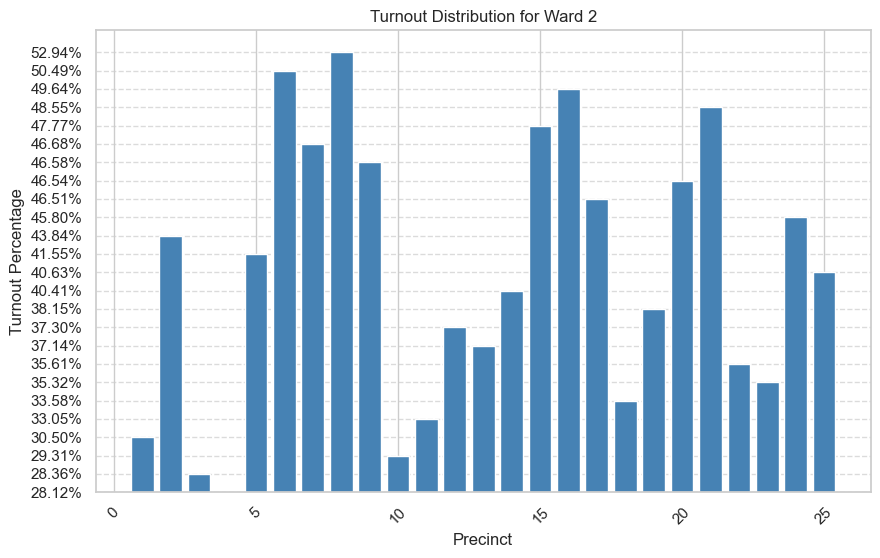

In [141]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter for Ward 2
ward_2_df = df[df["Ward"] == 2].sort_values(by="Turnout")

# Plot
plt.figure(figsize=(10, 6))
plt.bar(ward_2_df["Precinct"], ward_2_df["Turnout"], color="steelblue")

# Labels & Titles
plt.xlabel("Precinct")
plt.ylabel("Turnout Percentage")
plt.title("Turnout Distribution for Ward 2")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show Plot
plt.show()


In [36]:
df_cleaned.head()

,Precinct,Registered Voters,Ballots Cast,Turnout,Ward
0,1,1496,672,44.92,1.0
1,2,1457,709,48.66,1.0
2,3,1570,755,48.09,1.0
3,4,1498,629,41.99,1.0
4,5,1659,670,40.39,1.0


<bound method NDFrame.describe of 0       1496
1       1457
2       1570
3       1498
4       1659
        ... 
1482    1696
1483     382
1484     887
1485     272
1486    1153
Name: Registered Voters, Length: 1291, dtype: int64>

In [38]:
df_cleaned.sort_values(by="Registered Voters", ascending=False).head(20)


,Precinct,Registered Voters,Ballots Cast,Turnout,Ward
724,19,2976,1165,39.15,24.0
226,10,2579,427,16.56,8.0
1019,6,2321,922,39.72,35.0
1025,12,2145,754,35.15,35.0
1029,16,2123,748,35.23,35.0
1263,9,2109,863,40.92,43.0
844,25,2086,485,23.25,28.0
1345,6,2081,902,43.34,46.0
1290,9,2068,962,46.52,44.0
1451,14,2044,878,42.95,49.0


In [1]:
!pip install geopandas plotly shapely


In [2]:
import geopandas as gpd
import pandas as pd
import plotly.express as px


In [47]:
# Load the Chicago wards shapefile
wards_gdf = gpd.read_file("data/boundaries-ward-precinct/geo_export_f582634c-2a9b-46ab-87c0-3efdb0090ab7.shp")

# Check the first few rows
wards_gdf.head()


,shape_leng,shape_area,ward_preci,ward,precinct,geometry
0,1.460439,0.090769,01001,1.0,1.0,"POLYGON ((-87.70494 41.92756, -87.70522 41.927..."
1,1.940047,0.126205,01002,1.0,2.0,"POLYGON ((-87.69743 41.92531, -87.69752 41.925..."
2,2.044262,0.157988,01003,1.0,3.0,"POLYGON ((-87.69625 41.92664, -87.69627 41.926..."
3,1.434766,0.100694,01004,1.0,4.0,"POLYGON ((-87.7016 41.92061, -87.70164 41.9206..."
4,1.527099,0.102115,01005,1.0,5.0,"POLYGON ((-87.69722 41.91814, -87.69722 41.918..."


In [42]:
import geopandas as gpd
import pandas as pd
import plotly.express as px

# Ensure Ward and Precinct are integers
df_cleaned["Ward"] = df_cleaned["Ward"].astype(int)
df_cleaned["Precinct"] = df_cleaned["Precinct"].astype(int)

# Format them as zero-padded strings and concatenate
df_cleaned["ward_precinct"] = df_cleaned["Ward"].astype(str).str.zfill(2) + df_cleaned["Precinct"].astype(str).str.zfill(3)

# Display the updated DataFrame
df_cleaned.head()



,Precinct,Registered Voters,Ballots Cast,Turnout,Ward,ward_precinct
0,1,1496,672,44.92,1,01001
1,2,1457,709,48.66,1,01002
2,3,1570,755,48.09,1,01003
3,4,1498,629,41.99,1,01004
4,5,1659,670,40.39,1,01005


In [51]:
# Ensure both columns are strings for merging
wards_gdf["ward_preci"] = wards_gdf["ward_preci"].astype(str)
df_cleaned["ward_precinct"] = df_cleaned["ward_precinct"].astype(str)

# Merge shapefile with turnout data
merged_gdf = wards_gdf.merge(df_cleaned, left_on="ward_preci", right_on="ward_precinct", how="left")

# Check if merge worked
merged_gdf.head()

,shape_leng,shape_area,ward_preci,ward,precinct,geometry,Precinct,Registered Voters,Ballots Cast,Turnout,Ward,ward_precinct
0,1.460439,0.090769,01001,1.0,1.0,"POLYGON ((-87.70494 41.92756, -87.70522 41.927...",1,1496,672,44.92,1,01001
1,1.940047,0.126205,01002,1.0,2.0,"POLYGON ((-87.69743 41.92531, -87.69752 41.925...",2,1457,709,48.66,1,01002
2,2.044262,0.157988,01003,1.0,3.0,"POLYGON ((-87.69625 41.92664, -87.69627 41.926...",3,1570,755,48.09,1,01003
3,1.434766,0.100694,01004,1.0,4.0,"POLYGON ((-87.7016 41.92061, -87.70164 41.9206...",4,1498,629,41.99,1,01004
4,1.527099,0.102115,01005,1.0,5.0,"POLYGON ((-87.69722 41.91814, -87.69722 41.918...",5,1659,670,40.39,1,01005


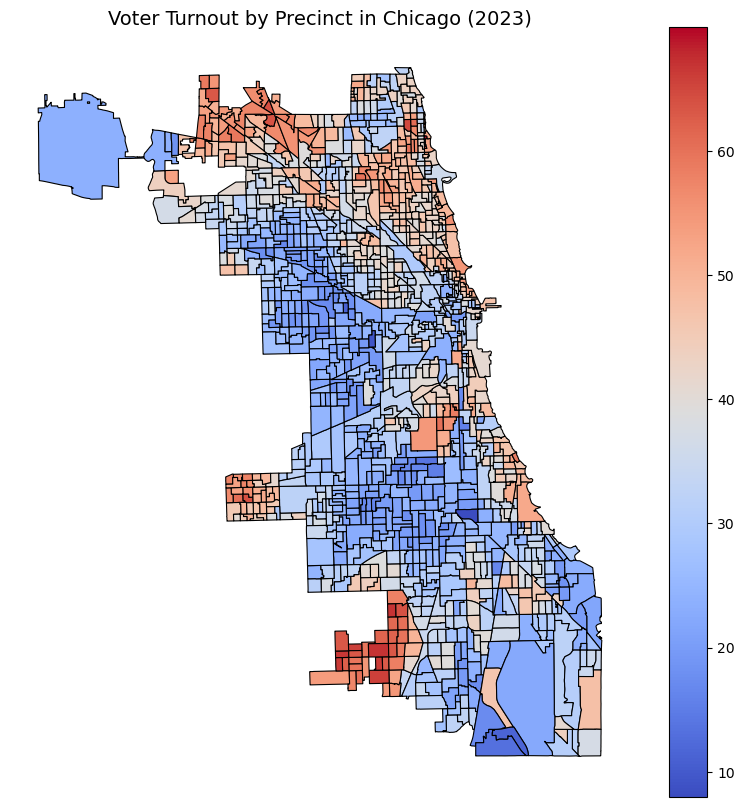

In [52]:
import matplotlib.pyplot as plt

# Plot the turnout percentage as a heatmap
fig, ax = plt.subplots(figsize=(10, 10))
merged_gdf.plot(column="Turnout", cmap="coolwarm", legend=True, linewidth=0.8, edgecolor="black", ax=ax)

# Titles and labels
plt.title("Voter Turnout by Precinct in Chicago (2023)", fontsize=14)
plt.axis("off")  # Remove axes for a cleaner look

# Show the map
plt.show()
